In [111]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml;

In [129]:
def load_config(path="../config/config.yaml"):
    with open(path, "r") as f:
        return yaml.safe_load(f)

config = load_config()
db = config['database']
conn = psycopg2.connect(
    dbname=db['dbname'],
    user=db['user'],
    password=db['password'],
    host=db['host'],
    port=db['port']
)

# Show distribution of greenspace
You can see that the vast majority of postcodes have very little greenspace.
These clog up the data and should be ignored

/tmp/ipykernel_46533/3178620165.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT park_score FROM postcodes WHERE park_score IS NOT NULL", conn)


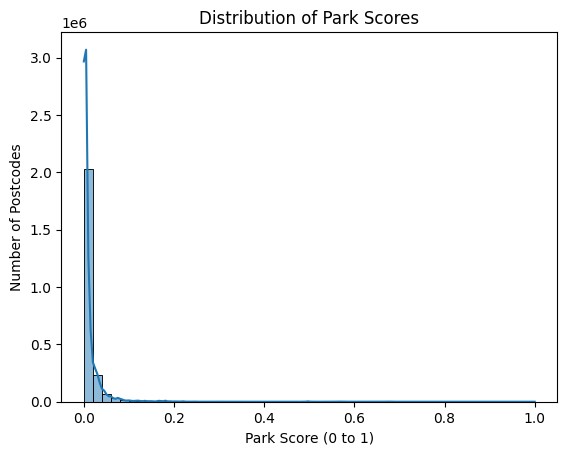

In [113]:
# Load data
df = pd.read_sql("SELECT park_score FROM postcodes WHERE park_score IS NOT NULL", conn)

# Plot histogram
sns.histplot(df['park_score'], bins=50, kde=True)
plt.title("Distribution of Park Scores")
plt.xlabel("Park Score (0 to 1)")
plt.ylabel("Number of Postcodes")
plt.show()


# Filter it down
From the above graph we can see that there is a massive peak in the 0-0.1 range.
If we ignore these we can see better distribution

/tmp/ipykernel_46533/2761613159.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT park_score FROM postcodes WHERE park_score IS NOT NULL AND park_score > 0.2", conn)


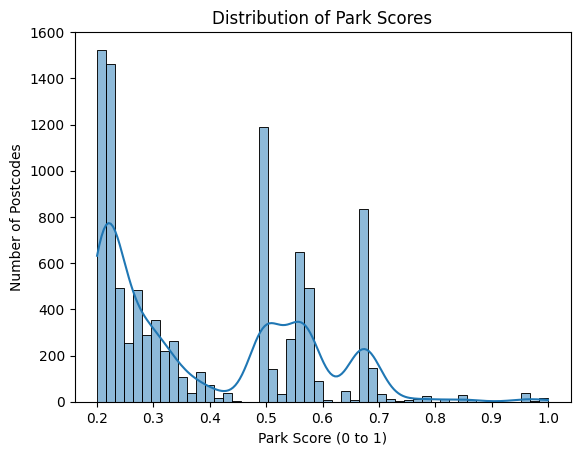

In [114]:
# Load data
df = pd.read_sql("SELECT park_score FROM postcodes WHERE park_score IS NOT NULL AND park_score > 0.2", conn)

# Plot histogram
sns.histplot(df['park_score'], bins=50, kde=True)
plt.title("Distribution of Park Scores")
plt.xlabel("Park Score (0 to 1)")
plt.ylabel("Number of Postcodes")
plt.show()


Above we can see that after filtering out the bottom 20% we have a nicer distribution. Still, we probably don't care too much about the 20% but let's have a look at an example

In [115]:
df = pd.read_sql("""
                 SELECT postcode, park_sqm, park_score
                 FROM postcodes 
                 WHERE park_score IS NOT NULL 
                   AND park_score > 0.2
                 ORDER BY park_score
                 LIMIT 1""", conn)

df


/tmp/ipykernel_46533/3045203961.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,postcode,park_sqm,park_score
0,LS15 9DW,3.525873e+06,0.200002


LS15 9DW
![image.png](figures/fig-1.png)

So this actually has quite a bit of green space around it. It might be that we have to filter it the other way around or use logarithmic scoring instead of just normalized score.

In [116]:
df = pd.read_sql("""
                 SELECT postcode, park_sqm, park_score, imd
                 FROM postcodes 
                 WHERE postcode = 'SO41 3NB'
                 LIMIT 1""", conn)

df

/tmp/ipykernel_46533/1984501494.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,postcode,park_sqm,park_score,imd
0,SO41 3NB,210180.526167,0.011922,31225


Funnily, Lyimington gets marked at 0.01!

In [117]:
# Load data
df = pd.read_sql("""
                 SELECT 
                 function AS category
                 FROM parks 
                 GROUP BY function""", conn)

df


/tmp/ipykernel_46533/1401335127.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,category
0,Allotments Or Community Growing Spaces
1,Bowling Green
2,Cemetery
3,Golf Course
4,Other Sports Facility
5,Play Space
6,Playing Field
7,Public Park Or Garden
8,Religious Grounds
9,Tennis Court


Might be that we filter some of these categories out?

Let's have a look at some of the highest scored postcodes to see if it's justified, take randomly from each 10th

In [118]:
df = pd.read_sql("""
                 SELECT postcode, park_sqm, park_score, imd
                 FROM postcodes 
                 WHERE park_score IS NOT NULL 
                 ORDER BY park_score DESC
                 LIMIT 2""", conn)

df


/tmp/ipykernel_46533/2740957821.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,postcode,park_sqm,park_score,imd
0,LE15 8HH,1.762921e+07,1.000000,32120
1,LE15 8HR,1.762753e+07,0.999905,32120


The 2 highest scoring.
![fig-2](figures/fig-2.png)
Both in Rutland. Massive park. Fair enough


In [119]:

df = pd.read_sql("""
                 SELECT postcode, park_sqm, park_score, imd
                 FROM postcodes 
                 WHERE park_score IS NOT NULL
                 AND park_score < 0.9 
                 ORDER BY park_score DESC
                 LIMIT 1""", conn)

df

/tmp/ipykernel_46533/1251559620.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,postcode,park_sqm,park_score,imd
0,SW15 3AN,1.518958e+07,0.861614,9403


Next at a score of 0.86 is Wimbledon

In [120]:
df = pd.read_sql("""
                 SELECT postcode, park_sqm, park_score, imd
                 FROM postcodes 
                 WHERE park_score IS NOT NULL
                 AND park_score < 0.8 
                 ORDER BY park_score DESC
                 LIMIT 1""", conn)
df

/tmp/ipykernel_46533/4288747910.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,postcode,park_sqm,park_score,imd
0,SW15 3PQ,1.387455e+07,0.787021,9403


Wimbledon again... 

In [121]:
df = pd.read_sql("""
                 SELECT postcode, park_sqm, park_score, imd
                 FROM postcodes 
                 WHERE park_score IS NOT NULL
                 AND park_score < 0.7 
                 ORDER BY park_score DESC
                 LIMIT 1""", conn)

df

/tmp/ipykernel_46533/3226526545.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,postcode,park_sqm,park_score,imd
0,SL4 1LS,1.226524e+07,0.695734,27933


SL4 1LS is in Windsor
I think the house price filter might do a lot of the work for us here :D

In [122]:
df = pd.read_sql("""
                 SELECT postcode, park_sqm, park_score, imd
                 FROM postcodes 
                 WHERE park_score IS NOT NULL
                 AND park_score < 0.6 
                 ORDER BY park_score DESC
                 LIMIT 1""", conn)

df

/tmp/ipykernel_46533/4220989607.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,postcode,park_sqm,park_score,imd
0,SW15 4DJ,1.052548e+07,0.597048,10975


Richmond! I'm starting to wonder what percentage of postcodes are actually in London

In [123]:
df = pd.read_sql("""
                SELECT
    COUNT(*) FILTER (
        WHERE oslaua IN (
            'E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005',
            'E09000006', 'E09000007', 'E09000008', 'E09000009', 'E09000010',
            'E09000011', 'E09000012', 'E09000013', 'E09000014', 'E09000015',
            'E09000016', 'E09000017', 'E09000018', 'E09000019', 'E09000020',
            'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
            'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
            'E09000031', 'E09000032'
        )
    ) AS london_postcodes,
    COUNT(*) AS total_postcodes,
    ROUND(
        100.0 * COUNT(*) FILTER (
            WHERE oslaua IN (
                'E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005',
                'E09000006', 'E09000007', 'E09000008', 'E09000009', 'E09000010',
                'E09000011', 'E09000012', 'E09000013', 'E09000014', 'E09000015',
                'E09000016', 'E09000017', 'E09000018', 'E09000019', 'E09000020',
                'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
                'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
                'E09000031', 'E09000032'
            )
        ) * 1.0 / COUNT(*), 2
    ) AS percent_london
FROM postcodes;"""
                 , conn)


df

/tmp/ipykernel_46533/3559207866.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,london_postcodes,total_postcodes,percent_london
0,300299,2714964,11.06


Quite a few

In [124]:
df = pd.read_sql("""
                 SELECT postcode, park_sqm, park_score, imd
                 FROM postcodes 
                 WHERE park_score IS NOT NULL
                 AND park_score < 0.5 
                 ORDER BY park_score DESC
                 LIMIT 1""", conn)

df

/tmp/ipykernel_46533/1556354626.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,postcode,park_sqm,park_score,imd
0,B73 6HJ,8.810427e+06,0.499763,24746


Sutton, nearby a large park.

In [125]:
df = pd.read_sql("""
                 SELECT COUNT(*),
                 AVG(park_score),
                 MAX(park_score)
                 FROM postcodes 
                 WHERE imd = 1""", conn)

df

/tmp/ipykernel_46533/3349945160.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,count,avg,max
0,419,0.003247,0.027141


419 places with a deprivation score of 1 and an average park score of just 0.003

For fun, let's find out the most deprived area with the least greenspace....

In [131]:
df = pd.read_sql("""
                 SELECT postcode, park_sqm, park_score, imd
                 FROM postcodes
                 WHERE park_score is not null
                 ORDER BY imd, park_score
                 LIMIT 1; """
                 , conn)

df

/tmp/ipykernel_46533/2080744326.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,postcode,park_sqm,park_score,imd
0,CO15 2DL,2502.7161,0.000142,1


Clacton-on-sea...

Back to distribution, let's see how many postcodes we're dealing with per score

In [147]:
df = pd.read_sql("""
                SELECT
                width_bucket(park_score, 0.0, 1.0, 10) AS score_bucket,
                COUNT(*) AS postcode_count
                FROM postcodes
                WHERE park_score IS NOT NULL
                GROUP BY score_bucket
                ORDER BY score_bucket;
                 """
                 , conn)

df

/tmp/ipykernel_46533/880321248.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,score_bucket,postcode_count
0,1,2375498
1,2,28220
2,3,4631
3,4,1020
4,5,1155
5,6,1804
6,7,1043
7,8,95
8,9,46
9,10,54


The above table groups total postcodes by score in .1 steps.
We can see that so many postcodes have almost no green space, with 2375498 having a score of .1 or less
For our needs this is actually quite helpful